# Introduction

In this project, I'll scrape Data from a popular [BasketBall Reference](https://www.basketball-reference.com) website, specifically their MVP tables from `year 2000` to `year 2023`. The main focus in this project is web scraping and Data parsing from HTML to a Pandas Dataframe. We will also try to create some visuals later on and perform some analysis on the players.

In [413]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import numpy as np
import matplotlib.pyplot as plt

Now that we have imported all the libraries we will need in this project, let's start. We will use requests library to fetch the HTML of the awards section of basketball-reference website. The awards section has links to different years from  `Year 1956` to `Year 2023`. We will be analyzing players from `Year 2000` to `Year 2023`

In [414]:
url='https://www.basketball-reference.com/awards/awards_2023.html'
headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
response=requests.get(url,headers=headers)
if response.status_code==200:
    html_content=response.text
else:
    print('Error')
with open('/Users/arshitgilhotra/Desktop/awards/awards_2023.html','w') as file:
    file.write(html_content)


In the code-cell above, We got the HTML file for `year 2023` to demonstrate the process we will use to collect the HTML files and save them on our computer. Now, We will repeat this process carefully and get the html files for years `2000 - 2022`. We do not want to get blocked by sending multiple requests all together so using 

In [415]:
for year in range(2000,2023):
    url='https://www.basketball-reference.com/awards/awards_{}.html'.format(year) #changing year in our url
    headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
    response=requests.get(url,headers=headers)
    if response.status_code==200:
        html_content=response.text
    else:
            print('Error')
    
    with open('/Users/arshitgilhotra/Desktop/awards/awards_{}.html'.format(year),'w') as file:
        file.write(html_content)
    time.sleep(random.randint(2,8))
    
    

Now We have 23 HTML files, one for each year containing the MVP table. Let's go through each file and begin parsing it.

In [416]:
with open('/Users/arshitgilhotra/Desktop/awards/awards_2000.html','r',encoding='utf-8') as file:
    html_content=file.read()
#parsing using BeautifulSoup
soup=BeautifulSoup(html_content,'html.parser')
table=soup.find(class_='sortable stats_table',id='mvp') # Finding the MPV table
table

<table class="sortable stats_table" data-cols-to-freeze=",2" id="mvp">
<caption>Most Valuable Player (Michael Jordan Trophy) Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr class="over_header">
<th aria-label="" class="over_header center" colspan="4" data-stat=""></th>
<th aria-label="" class="over_header center" colspan="4" data-stat="header_award_voting">Voting</th><th></th>
<th aria-label="" class="over_header center" colspan="6" data-stat="header_per_g">Per Game</th>
<th aria-label="" class="over_header center" colspan="3" data-stat="header_shooting">Shooting</th>
<th aria-label="" class="over_header center" colspan="2" data-stat="header_advanced">Advanced</th>
</tr>
<tr>
<th aria-label="rank" class="poptip center" data-stat="rank" scope="col">Rank</th>
<th aria-label="Player" class="poptip sort_default_asc left" data-stat="player" scope="col">Player</th>
<th ar

Now that we have the Table that we need, Let's Extract the column names from the table.To do that we will use the `scope` that we can see in the html, using that in find_all will provide us with the name of all columns in the table. After we do that we can create a `pandas DataFrame` and assign the column names to DataFrame's columns.

In [417]:
columns=table.find_all(scope='col')
columns=[col.text for col in columns]
columns
df1=pd.DataFrame(columns=columns)
df1

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48


Now that we have our DataFrame with the names of the columns, We will extract the Data from the HTML file and insert it into our rows. However, in our Data, we see that the rank column has different `HTML tag` compared to our other columns, so We will save our Rank in the Dataframe and after that we will save the rest of the rows.We will use the `scope` again for this and use `scope = 'row'` to find all the `Rank` values.

In [418]:
Ranks=table.find_all(scope='row')
Ranks= [Rank.text for Rank in Ranks]
df1['Rank']=Ranks
df1

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [419]:
rows=table.find_all('td')
data_list=[]
for row in rows:
    data_list.append(row.text)
data_list # With this we get all of our data in an array, 
# Now we have to create chunks of our Data so we can put that in our DataFrame
rows=[]
for index in range(0,len(data_list),19): # This will take the data and split it into chunks of 19 
    rows.append(data_list[index:index+19]) # This will print the data of each chunk 
data=pd.DataFrame(rows) # So that we can insert all our Data in our Orignal DataFrame
data  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,40.0,29.7,13.6,3.8,0.5,3.0,.574,.000,.524,18.6,.283
1,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,40.0,22.9,11.8,5.0,1.5,1.6,.497,.370,.765,11.6,.172
2,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,34.8,21.7,9.5,1.6,0.5,3.7,.551,.000,.711,12.9,.226
3,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,25.5,9.5,3.7,1.0,0.9,.509,.250,.797,15.3,.249
4,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,23.2,12.4,3.2,0.9,2.2,.490,.091,.761,13.0,.218
5,Gary Payton,31,SEA,0.0,180.0,1210,0.149,82,41.8,24.2,6.5,8.9,1.9,0.2,.448,.340,.735,13.9,.195
6,Allen Iverson,24,PHI,1.0,132.0,1210,0.109,70,40.8,28.4,3.8,4.7,2.1,0.1,.421,.341,.713,6.9,.116
7,Grant Hill,27,DET,0.0,113.0,1210,0.093,74,37.5,25.8,6.6,5.2,1.4,0.6,.489,.347,.795,10.7,.185
8,Chris Webber,26,SAC,0.0,96.0,1210,0.079,75,38.4,24.5,10.5,4.6,1.6,1.7,.483,.284,.751,10.7,.179
9,Vince Carter,23,TOR,0.0,51.0,1210,0.042,82,38.1,25.7,5.8,3.9,1.3,1.1,.465,.403,.791,11.8,.182


In [420]:
df1.iloc[:,1:]= data # Since we have already filled our 'Rank' column, we will start with 1 index
df1

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,40.0,29.7,13.6,3.8,0.5,3.0,.574,.000,.524,18.6,.283
1,2,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,40.0,22.9,11.8,5.0,1.5,1.6,.497,.370,.765,11.6,.172
2,3,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,34.8,21.7,9.5,1.6,0.5,3.7,.551,.000,.711,12.9,.226
3,4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,25.5,9.5,3.7,1.0,0.9,.509,.250,.797,15.3,.249
4,5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,23.2,12.4,3.2,0.9,2.2,.490,.091,.761,13.0,.218
5,6,Gary Payton,31,SEA,0.0,180.0,1210,0.149,82,41.8,24.2,6.5,8.9,1.9,0.2,.448,.340,.735,13.9,.195
6,7,Allen Iverson,24,PHI,1.0,132.0,1210,0.109,70,40.8,28.4,3.8,4.7,2.1,0.1,.421,.341,.713,6.9,.116
7,8,Grant Hill,27,DET,0.0,113.0,1210,0.093,74,37.5,25.8,6.6,5.2,1.4,0.6,.489,.347,.795,10.7,.185
8,9,Chris Webber,26,SAC,0.0,96.0,1210,0.079,75,38.4,24.5,10.5,4.6,1.6,1.7,.483,.284,.751,10.7,.179
9,10,Vince Carter,23,TOR,0.0,51.0,1210,0.042,82,38.1,25.7,5.8,3.9,1.3,1.1,.465,.403,.791,11.8,.182


Now All we have to do is loop this process for all other Files together and keep joining that Data to our original DataFrame. However, We know that each Year, we will have different names at Different ranks, so I will add a column Year to our DataFrame which will help us identify the Year in which a player got a certain  Rank.

In [421]:
df1["Year"]= 2020 #we know the year for this file so i am doing it manually
#For the rest of the files We will automate this process.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     16 non-null     object
 1   Player   16 non-null     object
 2   Age      16 non-null     object
 3   Tm       16 non-null     object
 4   First    16 non-null     object
 5   Pts Won  16 non-null     object
 6   Pts Max  16 non-null     object
 7   Share    16 non-null     object
 8   G        16 non-null     object
 9   MP       16 non-null     object
 10  PTS      16 non-null     object
 11  TRB      16 non-null     object
 12  AST      16 non-null     object
 13  STL      16 non-null     object
 14  BLK      16 non-null     object
 15  FG%      16 non-null     object
 16  3P%      16 non-null     object
 17  FT%      16 non-null     object
 18  WS       16 non-null     object
 19  WS/48    16 non-null     object
 20  Year     16 non-null     int64 
dtypes: int64(1), object(20)
memory usage: 2.8

Okay Now We are all set with our first DataFrame, and we have shown the process of converting the HTML to Pandas DataFrame, I will now automate this for my other HTML files for years between 2001-2023. At the end of each loop we will add the Data on top of our orignal DataFrame and reset the index of our DataFrame.

In [422]:
for year in range(2001,2024):
    with open('/Users/arshitgilhotra/Desktop/awards/awards_{}.html'.format(year),'r',encoding='utf-8') as file:
        html_content=file.read()
    #parsing using BeautifulSoup
    soup=BeautifulSoup(html_content,'html.parser')
    table=soup.find(class_='sortable stats_table',id='mvp') # Finding the MPV table

    #COLUMNS
    columns=table.find_all(scope='col')
    columns=[col.text for col in columns]
    
    #RANKS COLUMN
    df=pd.DataFrame(columns=columns)
    Ranks=table.find_all(scope='row')
    Ranks= [Rank.text for Rank in Ranks]
    df['Rank']=Ranks

    #ROWS
    rows=table.find_all('td')
    data_list=[]
    for row in rows:
        data_list.append(row.text)
     # With this we get all of our data in an array, 
     # Now we have to seperate chunks of our Data so we can put that in the rows of our DataFrame
    data=[] # seperated chunks of our Data
    for index in range(0,len(data_list),19): # This will take the data and split it into chunks of 19 
        data.append(data_list[index:index+19]) # This will print the data of each chunk 
    data=pd.DataFrame(data) # So that we can insert all our Data in our Orignal DataFrame
    
    #PLACING DATA IN ORIGINAL DATAFRAME
    df.iloc[:,1:]= data # Since we have already filled our 'Rank' column, we will start with 1 index
    
    #Adding Year column
    df["Year"]= year 
    df1=pd.concat([df1,df]) #joining the current Dataframe to our Orignal DataFrame
    

# TO FIX THE INDEX
df1.reset_index(drop=True, inplace=True)

Great, Our work to extract the Data From the HTML pages is now complete, all we need to do now is clean our Data and change the DataTypes so that It can used for analysis. Let's Take a look at our DataFrame now.

In [423]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     339 non-null    object
 1   Player   339 non-null    object
 2   Age      339 non-null    object
 3   Tm       339 non-null    object
 4   First    339 non-null    object
 5   Pts Won  339 non-null    object
 6   Pts Max  339 non-null    object
 7   Share    339 non-null    object
 8   G        339 non-null    object
 9   MP       339 non-null    object
 10  PTS      339 non-null    object
 11  TRB      339 non-null    object
 12  AST      339 non-null    object
 13  STL      339 non-null    object
 14  BLK      339 non-null    object
 15  FG%      339 non-null    object
 16  3P%      339 non-null    object
 17  FT%      339 non-null    object
 18  WS       339 non-null    object
 19  WS/48    339 non-null    object
 20  Year     339 non-null    int64 
dtypes: int64(1), object(20)
memory usage: 5

In [424]:
df1=df1.replace('',np.nan)

In [425]:
numeric_columns=list(df1.columns)
# CHECKING THE DATAFRAME, WE SEE 4 columns that are not numerical
# ['Player', 'Year', 'Rank', 'Tm']
numeric_columns=list(filter(lambda x: x != 'Player' and x != 'Year' and x != 'Rank' and  x != 'Tm',numeric_columns))

#CONVERTS ALL NUMERIC COLUMNS TO NUMERIC DATA TYPE
numeric_columns
df1[numeric_columns]=df1[numeric_columns].apply(pd.to_numeric)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     339 non-null    object 
 1   Player   339 non-null    object 
 2   Age      339 non-null    int64  
 3   Tm       339 non-null    object 
 4   First    339 non-null    float64
 5   Pts Won  339 non-null    float64
 6   Pts Max  339 non-null    int64  
 7   Share    339 non-null    float64
 8   G        339 non-null    int64  
 9   MP       339 non-null    float64
 10  PTS      339 non-null    float64
 11  TRB      339 non-null    float64
 12  AST      339 non-null    float64
 13  STL      339 non-null    float64
 14  BLK      339 non-null    float64
 15  FG%      339 non-null    float64
 16  3P%      330 non-null    float64
 17  FT%      339 non-null    float64
 18  WS       339 non-null    float64
 19  WS/48    339 non-null    float64
 20  Year     339 non-null    int64  
dtypes: float64(14), 

We are all set now. Let's take a look at our completed DataFrame.

In [426]:
df1

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,40.0,...,13.6,3.8,0.5,3.0,0.574,0.000,0.524,18.6,0.283,2020
1,2,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,40.0,...,11.8,5.0,1.5,1.6,0.497,0.370,0.765,11.6,0.172,2020
2,3,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,34.8,...,9.5,1.6,0.5,3.7,0.551,0.000,0.711,12.9,0.226,2020
3,4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,...,9.5,3.7,1.0,0.9,0.509,0.250,0.797,15.3,0.249,2020
4,5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,...,12.4,3.2,0.9,2.2,0.490,0.091,0.761,13.0,0.218,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,9,Stephen Curry,34,GSW,0.0,5.0,1000,0.005,56,34.7,...,6.1,6.3,0.9,0.4,0.493,0.427,0.915,7.8,0.192,2023
335,10,Jimmy Butler,33,MIA,0.0,3.0,1000,0.003,64,33.4,...,5.9,5.3,1.8,0.3,0.539,0.350,0.850,12.3,0.277,2023
336,11,De'Aaron Fox,25,SAC,0.0,2.0,1000,0.002,73,33.4,...,4.2,6.1,1.1,0.3,0.512,0.324,0.780,7.4,0.146,2023
337,12T,Jalen Brunson,26,NYK,0.0,1.0,1000,0.001,68,35.0,...,3.5,6.2,0.9,0.2,0.491,0.416,0.829,8.7,0.175,2023


Before I perform any analysis on the Data, I would like to save this Data as a `.csv` file in my local machine. So let's do that.

In [427]:
df1.to_csv('/Users/arshitgilhotra/Desktop/BasketBall Scraping/BasketBall_MVP_2000_2023.csv')

Let's take a look at the average Stats of the numerical columns such as mean, std deviation, min ,max and percentile values of numerical columns.

In [428]:
df1.describe()

,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,330.000000,339.000000,339.000000,339.000000,339.000000
mean,27.330383,8.312684,216.064897,1181.356932,0.184041,73.194690,36.060472,23.209735,7.365192,5.378171,1.328909,0.885251,0.484755,0.315894,0.794941,10.964012,0.198823,2011.831858
std,3.895452,24.482989,333.118724,107.047186,0.282855,8.547319,2.977942,5.098560,3.061379,2.576199,0.492718,0.775639,0.046366,0.117430,0.094293,3.123295,0.047181,6.759918
min,19.000000,0.000000,1.000000,1000.000000,0.001000,39.000000,25.600000,6.900000,2.300000,1.000000,0.200000,0.000000,0.384000,0.000000,0.422000,2.800000,0.075000,2001.000000
25%,24.000000,0.000000,4.000000,1010.000000,0.003000,68.000000,34.100000,19.900000,4.800000,3.200000,1.000000,0.300000,0.453500,0.297250,0.751000,8.800000,0.168500,2006.000000
50%,27.000000,0.000000,31.000000,1210.000000,0.026000,76.000000,36.100000,23.400000,6.900000,5.100000,1.300000,0.600000,0.480000,0.347000,0.811000,10.800000,0.198000,2012.000000
75%,30.000000,1.000000,332.000000,1260.000000,0.274500,80.000000,38.200000,27.100000,9.800000,7.000000,1.600000,1.300000,0.507000,0.380000,0.861000,12.900000,0.226000,2018.000000
max,38.000000,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,36.100000,15.400000,11.700000,2.800000,3.700000,0.675000,1.000000,0.938000,20.300000,0.322000,2023.000000


This gives us quite a few insights about the MVP(s), such as the average age and max and minimum scores of one individual. Let's see who has been in the ranking the most over the years. We will take in the top 5 players and conduct further analysis on them.

In [429]:
df1.groupby('Player').size().sort_values(ascending=False).head(5)

Player
LeBron James     19
Tim Duncan       14
Kobe Bryant      13
Dirk Nowitzki    12
Chris Paul       11
dtype: int64

Seems like `LeBron James` has been in the Ranking lists the most, followed by `Tim Duncan` and `Kobe Bryant`. Now Let's see how many points have these players scored in total in all th year rankings. I am going to save these players as a list so we can access them easily whenever we want. I'll clal the list `Top_five`

In [430]:

top_five=list(df1.groupby('Player').size().sort_values(ascending=False).head(5).index)

Let's seperate the Data for our top_five players so we can compare them easily.

In [431]:
top_five_df= df1[df1['Player'].isin(top_five)]
top_five_df

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
4,5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,...,12.4,3.2,0.9,2.2,0.490,0.091,0.761,13.0,0.218,2020
11,12,Kobe Bryant,21,LAL,0.0,3.0,1210,0.002,66,38.2,...,6.3,4.9,1.6,0.9,0.468,0.319,0.821,10.6,0.202,2020
17,2,Tim Duncan,24,SAS,18.0,706.0,1240,0.569,82,38.7,...,12.2,3.0,0.9,2.3,0.499,0.259,0.618,13.2,0.200,2001
24,9,Kobe Bryant,22,LAL,0.0,11.0,1240,0.009,68,40.9,...,5.9,5.0,1.7,0.6,0.464,0.305,0.853,11.3,0.196,2001
33,1,Tim Duncan,25,SAS,57.0,954.0,1260,0.757,82,40.6,...,12.7,3.7,0.7,2.5,0.508,0.100,0.799,17.8,0.257,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,7,Chris Paul,34,OKC,0.0,26.0,1010,0.026,70,31.5,...,5.0,6.7,1.6,0.2,0.489,0.365,0.907,8.9,0.193,2020
303,5,Chris Paul,35,PHO,2.0,139.0,1010,0.138,70,31.4,...,4.5,8.9,1.4,0.3,0.499,0.395,0.934,9.2,0.201,2021
312,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021
322,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022


Let's make a graph that correlates between the top 5 players rank and age. In our DataFrame at many places we see our ranks as `11T` `10T` `13T` and so on, To make sure the correlation graph is goood I will convert those values to integers and remove the alphabetic characters for the graph only using `str.replace()` method

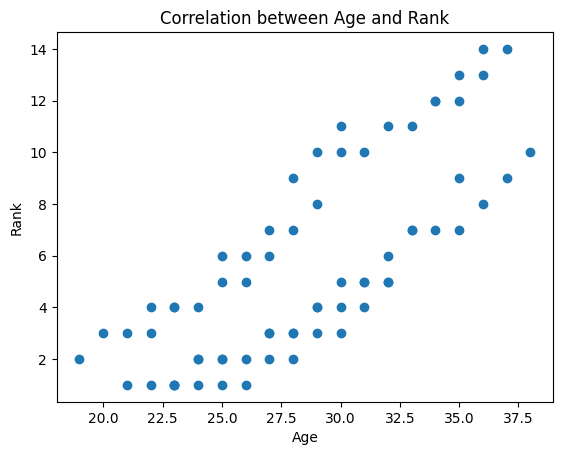

In [432]:
# Using str.replace() to remove the 'T' from the Rank column and then converting its type to int
plt.scatter(top_five_df['Age'],(top_five_df['Rank'].str.replace('T','').astype(int).sort_values()))
plt.xlabel('Age')
plt.ylabel('Rank')
plt.title('Correlation between Age and Rank')

plt.show()

We see a steep correlation between `age` and `Rank` just like one would expect. As a person ages their atheletic condition declines, considering that there is a player with `age` almost 38 and still in the rankings is quite impressive. let's see who this player is.

In [433]:
top_five_df[top_five_df['Age']==top_five_df['Age'].max()]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
238,10T,Tim Duncan,38,SAS,0.0,1.0,1300,0.001,77,28.9,...,9.1,3.0,0.8,2.0,0.512,0.286,0.74,9.6,0.207,2015


We can see that the oldest player in rankings between the years 2000-2023 is `Tim Duncan` at age 38, He ranked `10T` in year 2015. That is pretty impressive.

# Conclusion
In this project we scraped about 23 web pages to get MVP tables from a website about BasketBall, We used various methods and libraries to do this including requests, We parsed that Data and made it into a DataFrame by combining the Data from all the websites, which made the Data really accessible and easy for analysis. We also did some analysis on the Data to find the top five players, including scatter-plot the player rank and age correlation between the top players, We also checked which Player was the oldest to be in the rankings. Turns out it was `Tim Duncan` and his age was 38 at the time!